In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df=pd.read_csv(r"D:\New folder\archive\Admission_Predict.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [6]:
df.head(8)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68


In [7]:
df.tail(6)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
394,395,329,111,4,4.5,4.0,9.23,1,0.89
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [8]:
df.dtypes
print(type(df))

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

<class 'pandas.core.frame.DataFrame'>


In [9]:
df.drop(["Serial No."],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.shape

(400, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [12]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [13]:
df.isnull().values.any()

False

In [14]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [15]:
df.sum()

GRE Score            126723.00
TOEFL Score           42964.00
University Rating      1235.00
SOP                    1360.00
LOR                    1381.00
CGPA                   3439.57
Research                219.00
Chance of Admit         289.74
dtype: float64

In [16]:
df.mean()

GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

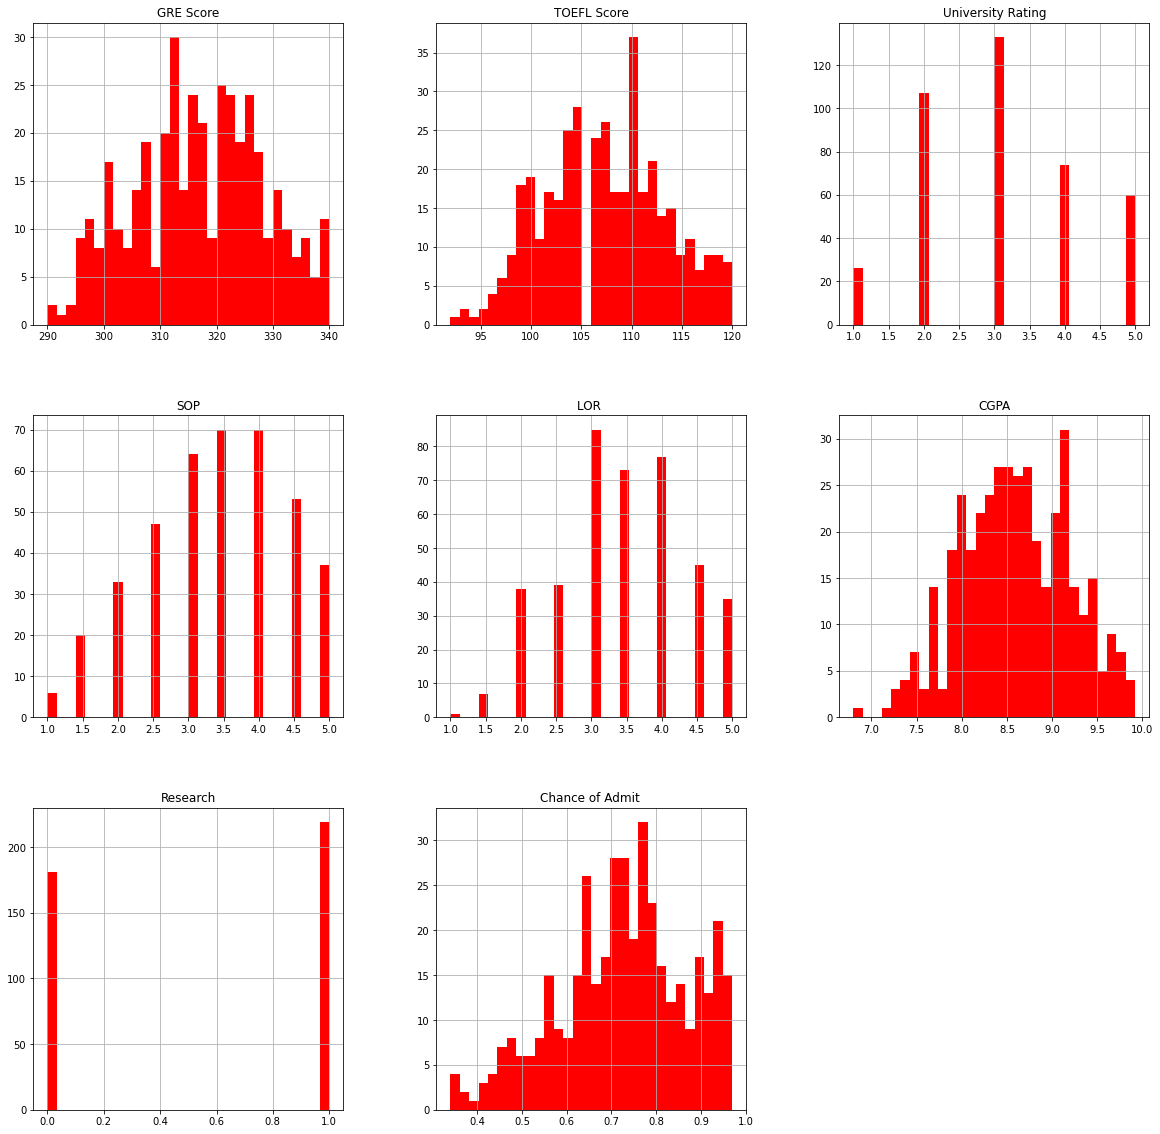

In [17]:
df.hist(bins=30,figsize=(20,20),color='r')

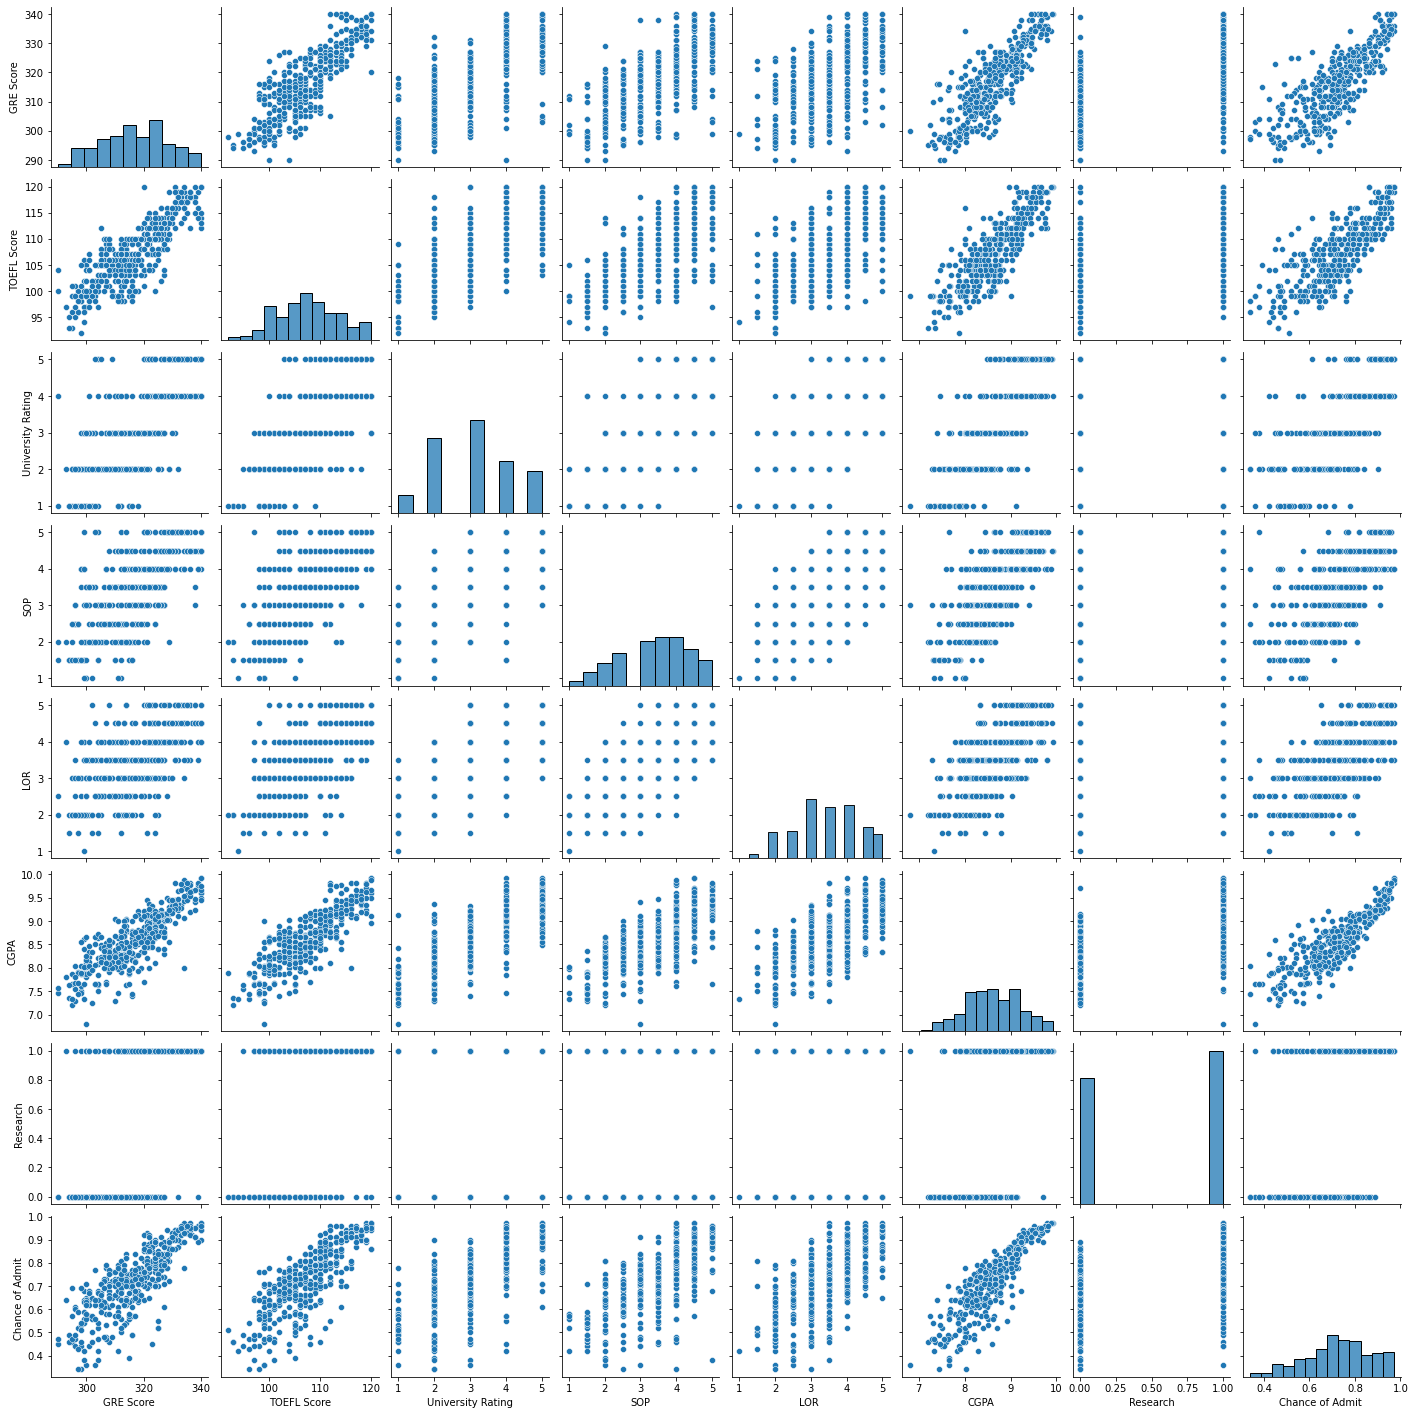

In [18]:
sns.pairplot(df)

In [19]:
sns.set(color_codes=True)

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

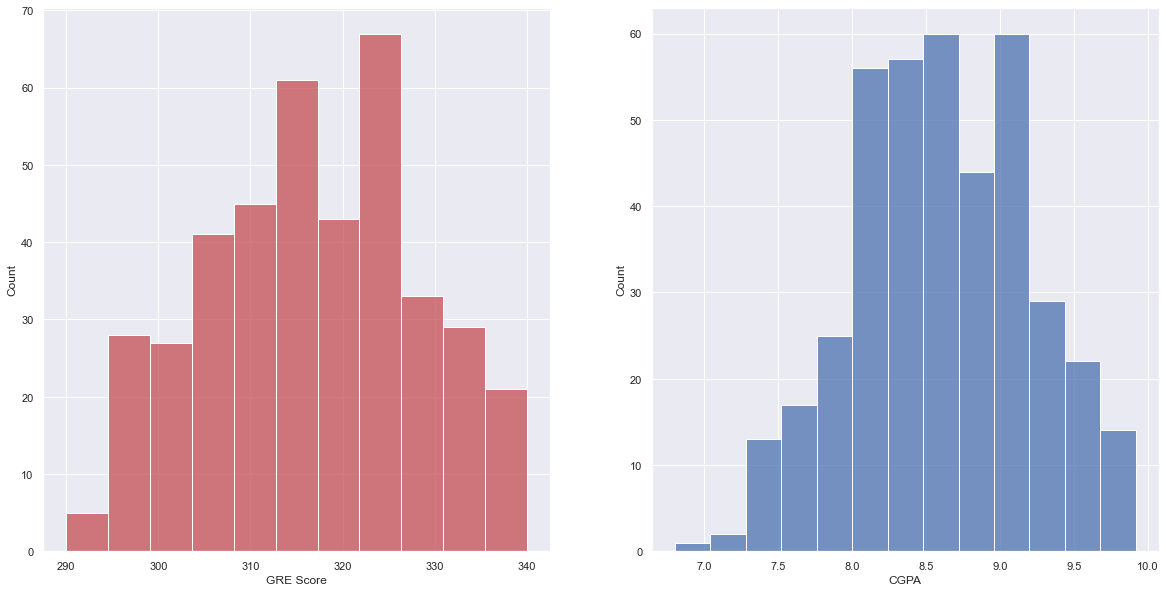

In [20]:
f,axes=plt.subplots(1,2,figsize=(20,10))
sns.histplot(df.iloc[:,0],color='r',ax=axes[0])
sns.histplot(df.iloc[:,5],color='b',ax=axes[1])

<Figure size 864x864 with 0 Axes>

<AxesSubplot:>

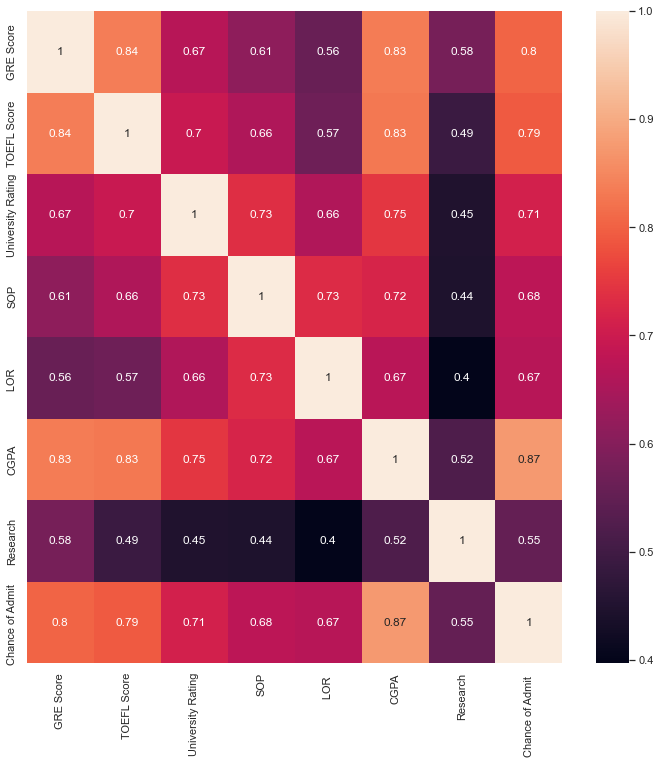

In [21]:
corr_matrix=df.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix,annot=True)
plt.show()

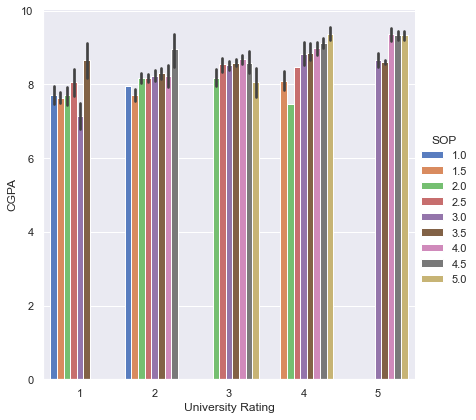

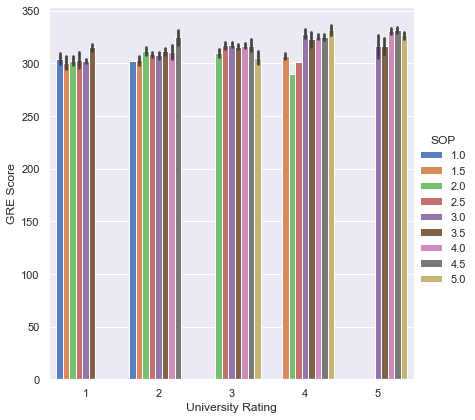

In [22]:
sns.catplot(x="University Rating", y="CGPA", hue="SOP", data=df,
           height=6, kind="bar", palette="muted")
sns.catplot(x="University Rating", y="GRE Score", hue="SOP", data=df,
           height=6, kind="bar", palette="muted")

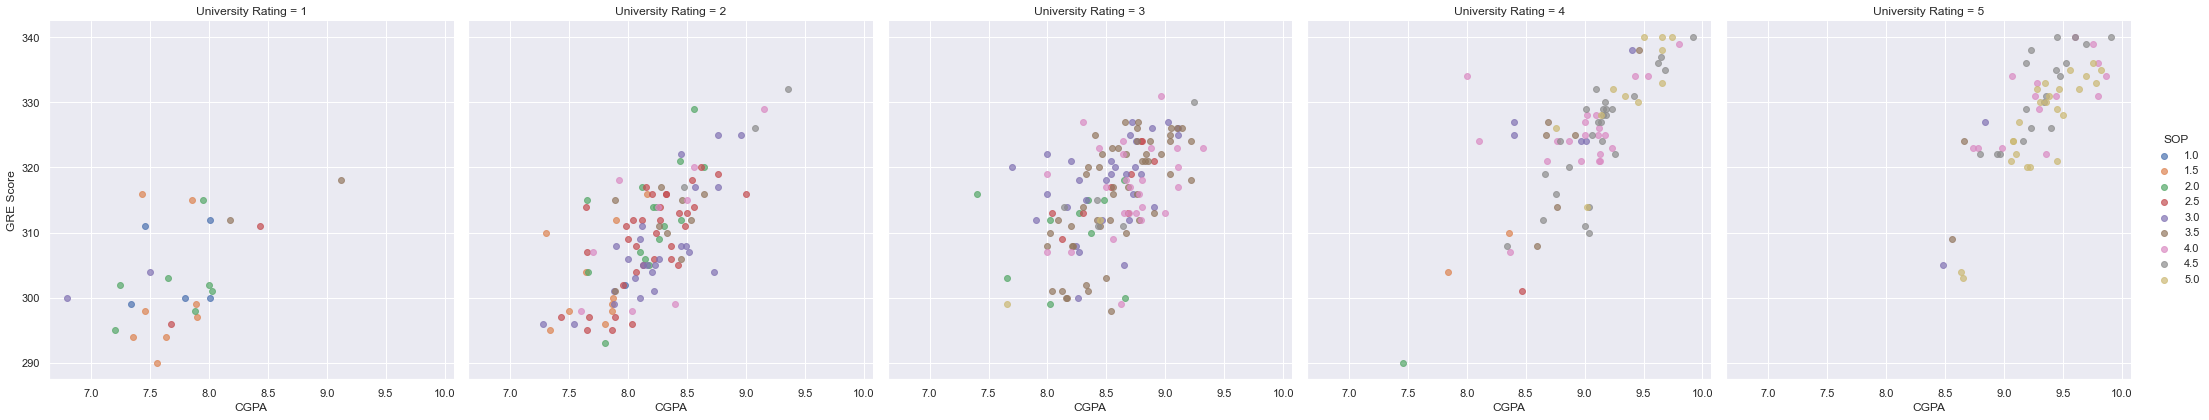

In [23]:
g = sns.FacetGrid(df,col='University Rating',hue="SOP",height=6)
g.map(plt.scatter, "CGPA", "GRE Score", alpha=.7)
g.add_legend();

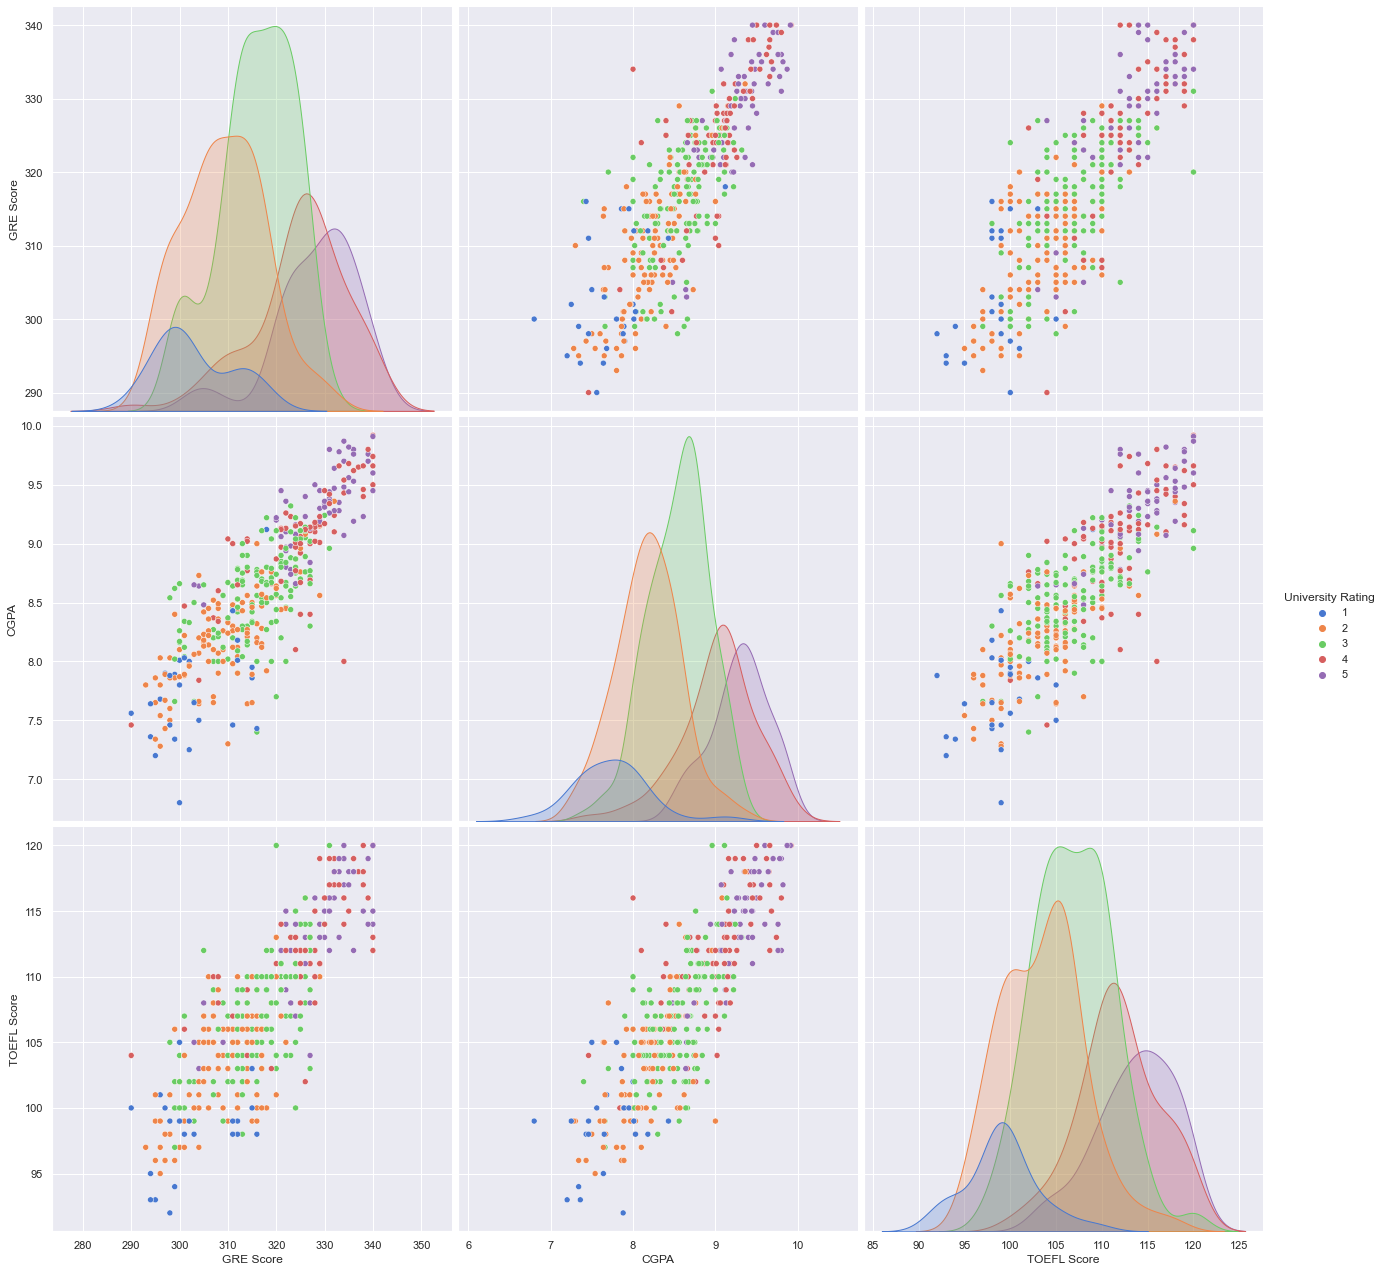

In [25]:
sns.pairplot(df, hue="University Rating",palette="muted",x_vars=['GRE Score', 'CGPA', 'TOEFL Score'],y_vars=['GRE Score', 'CGPA', 'TOEFL Score'],height=6)

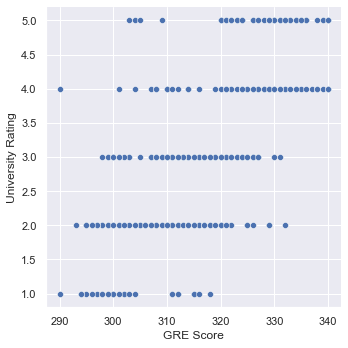

In [27]:
sns.relplot(x="GRE Score",y="University Rating",data=df)

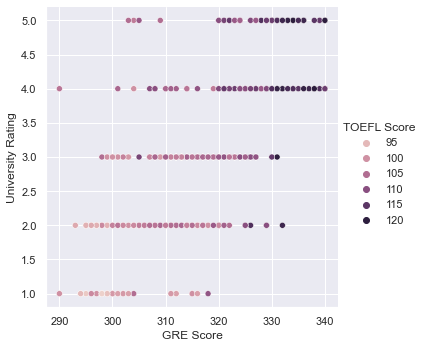

In [28]:
sns.relplot(x="GRE Score",y="University Rating",hue="TOEFL Score",data=df)

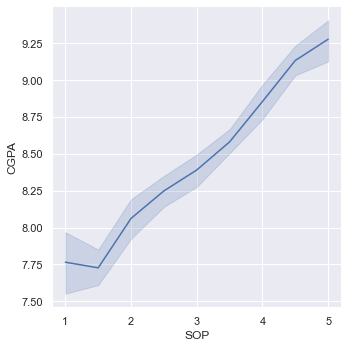

In [29]:
sns.relplot(x="SOP",y="CGPA",data=df,kind="line")

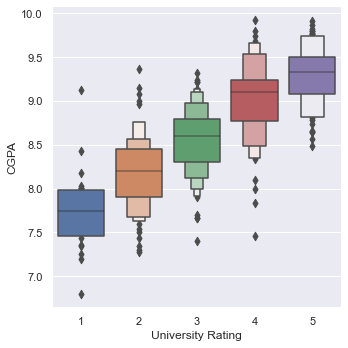

In [30]:
sns.catplot(y="CGPA",x="University Rating",kind="boxen",data=df)

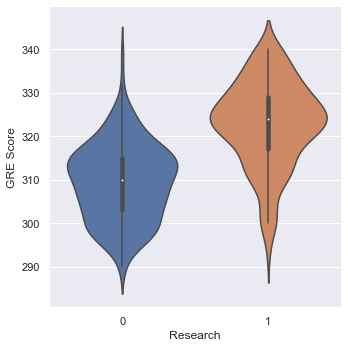

In [31]:
sns.catplot(y="GRE Score",x="Research",kind="violin",data=df)

In [32]:
from scipy import stats

In [33]:
c=np.random.normal(loc=5,size=100,scale=2)

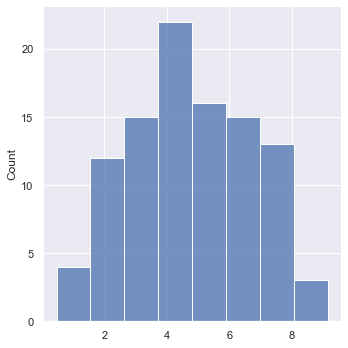

In [35]:
sns.displot(c)

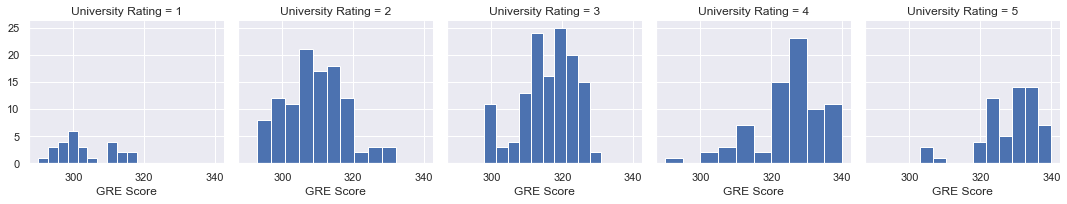

In [38]:
b=sns.FacetGrid(df,col="University Rating")
b.map(plt.hist,"GRE Score")

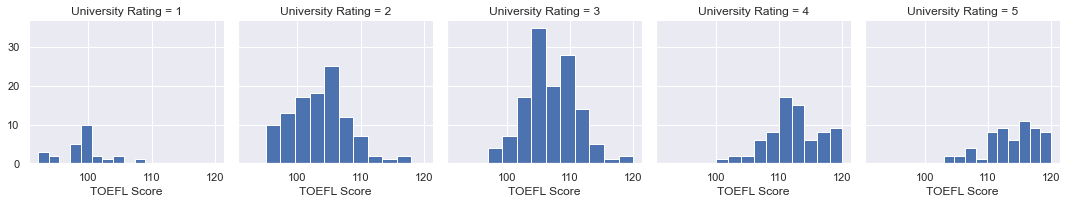

In [39]:
b=sns.FacetGrid(df,col="University Rating")
b.map(plt.hist,"TOEFL Score")

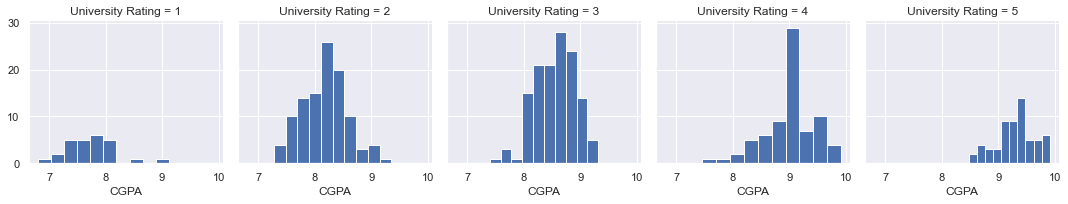

In [40]:
b=sns.FacetGrid(df,col="University Rating")
b.map(plt.hist,"CGPA")

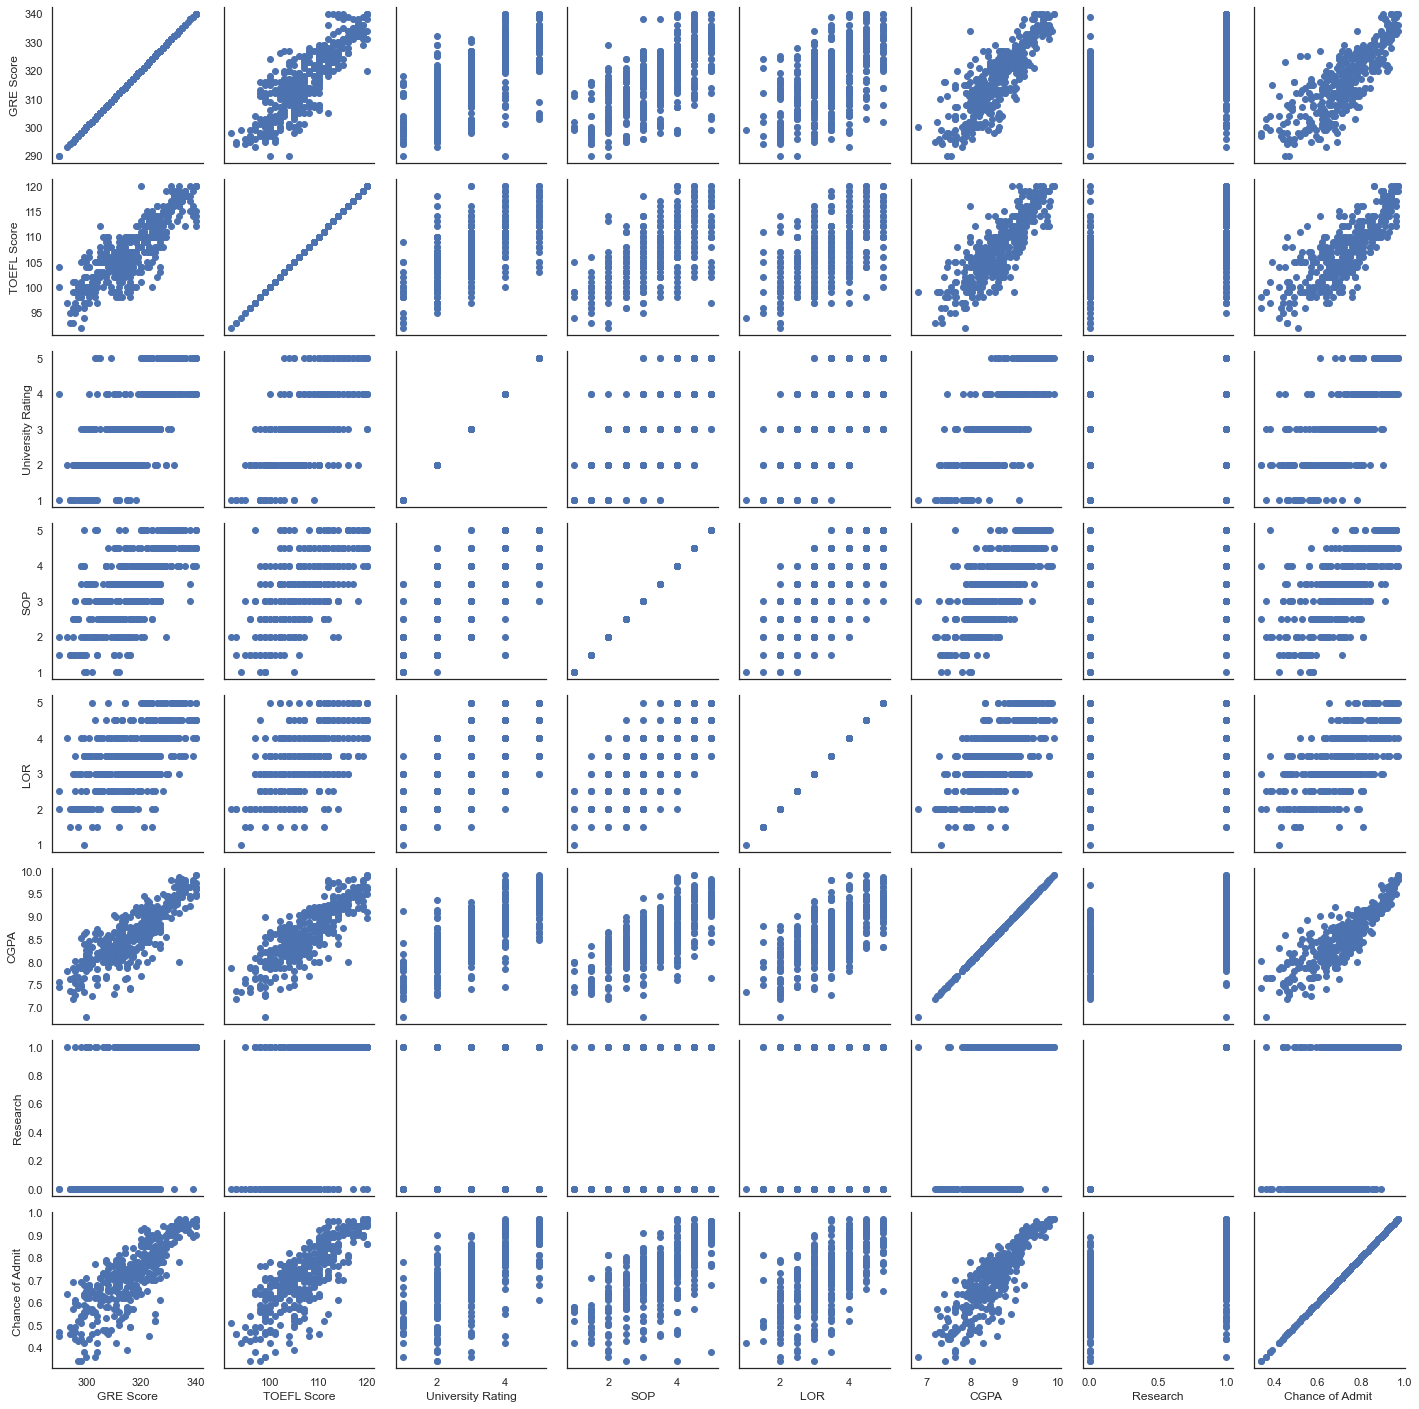

In [41]:
sns.set(style="white")
b=sns.PairGrid(df)
b.map(plt.scatter)

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

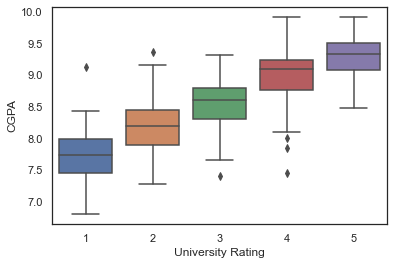

In [43]:
sns.set(style="white",color_codes=True)
sns.boxplot(x="University Rating",y="CGPA",data=df)

In [44]:
x=df.iloc[:,0:7].values

In [45]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [46]:
y=df.iloc[:,7:].values

In [47]:
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [48]:
x.shape

(400, 7)

In [49]:
y.shape

(400, 1)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                             random_state=10)

In [52]:
y_train=(y_train>0.5)

In [53]:
y_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [54]:
y_test=(y_test>0.5)

In [55]:
y_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [56]:
import importlib.util
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [57]:
cls = LogisticRegression(random_state=0)

In [58]:
lr=cls.fit(x_train,y_train)

C:\Users\KAREEM\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KAREEM\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
y_pred = lr.predict(x_test)

In [60]:
y_pred

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [61]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [62]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred)*100))


Accuracy score: 91.250000


In [63]:
print("Recall score: %f" %(recall_score(y_test,y_pred)*100))

Recall score: 97.333333


In [64]:
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred)*100))

ROC score : 48.666667



In [65]:
print(confusion_matrix(y_test,y_pred))

[[ 0  5]
 [ 2 73]]


In [66]:
import pickle
pickle.dump(lr,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))